# 函数拟合练习

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## 准备数据

In [3]:
# 定义要拟合的函数
def target_function(x):
    return 2*x**3 - 3*x**2 + 2*x - 1

# 生成训练集和测试集
def generate_data(n_samples=1000):
    np.random.seed(0)
    x_train = np.random.uniform(-2, 2, size=(n_samples, 1)).astype(np.float32)
    y_train = target_function(x_train) + np.random.normal(scale=0.1, size=(n_samples, 1)).astype(np.float32)
    x_test = np.linspace(-2, 2, 100).reshape(-1, 1).astype(np.float32)
    y_test = target_function(x_test)
    return x_train, y_train, x_test, y_test

# 生成数据
x_train, y_train, x_test, y_test = generate_data()
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[ 0.19525401]
 [ 0.86075747]
 [ 0.4110535 ]
 [ 0.17953274]
 [-0.3053808 ]
 [ 0.58357644]
 [-0.24965115]
 [ 1.5670921 ]
 [ 1.8546511 ]
 [-0.46623394]
 [ 1.1669002 ]
 [ 0.11557968]
 [ 0.27217823]
 [ 1.7023865 ]
 [-1.7158557 ]
 [-1.6514828 ]
 [-1.9191264 ]
 [ 1.3304794 ]
 [ 1.112627  ]
 [ 1.4800485 ]
 [ 1.9144734 ]
 [ 1.1966343 ]
 [-0.15408255]
 [ 1.1221167 ]
 [-1.5269023 ]
 [ 0.5596841 ]
 [-1.4265869 ]
 [ 1.7786757 ]
 [ 0.08739328]
 [-0.34135225]
 [-0.9417775 ]
 [ 1.0969348 ]
 [-0.17539868]
 [ 0.2737358 ]
 [-1.9248408 ]
 [ 0.47054198]
 [ 0.44838288]
 [ 0.46773598]
 [ 1.7749923 ]
 [ 0.7272812 ]
 [-0.5619684 ]
 [-0.25187218]
 [ 0.7905248 ]
 [-1.7590982 ]
 [ 0.6670669 ]
 [ 0.6825515 ]
 [-1.1584698 ]
 [-1.4842948 ]
 [-0.7382866 ]
 [-0.5451569 ]
 [ 0.28078708]
 [-0.24559395]
 [ 1.9534954 ]
 [-1.5918207 ]
 [-1.164493  ]
 [-1.354762  ]
 [ 0.6124333 ]
 [-0.9868336 ]
 [-0.13475691]
 [-1.0222976 ]
 [-1.3641217 ]
 [-1.5584995 ]
 [ 0.62531835]
 [-1.4472682 ]
 [-1.2136706 ]
 [-0.52509934]
 [ 1.28397

## 建立模型

In [9]:
# 定义神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10) # 输入层到隐藏层
        self.fc2 = nn.Linear(10, 1) # 隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型实例
model = SimpleNN()

## 训练模型

In [10]:
# 训练神经网络
def train_model(model, x_train, y_train, epochs=5000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        inputs = torch.from_numpy(x_train)
        targets = torch.from_numpy(y_train)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
# 训练模型
train_model(model, x_train, y_train)

Epoch [100/5000], Loss: 15.2900
Epoch [200/5000], Loss: 7.6806
Epoch [300/5000], Loss: 4.6169
Epoch [400/5000], Loss: 2.4911
Epoch [500/5000], Loss: 1.3604
Epoch [600/5000], Loss: 0.8058
Epoch [700/5000], Loss: 0.5143
Epoch [800/5000], Loss: 0.3571
Epoch [900/5000], Loss: 0.2616
Epoch [1000/5000], Loss: 0.1997
Epoch [1100/5000], Loss: 0.1574
Epoch [1200/5000], Loss: 0.1265
Epoch [1300/5000], Loss: 0.1075
Epoch [1400/5000], Loss: 0.0951
Epoch [1500/5000], Loss: 0.0883
Epoch [1600/5000], Loss: 0.0842
Epoch [1700/5000], Loss: 0.0808
Epoch [1800/5000], Loss: 0.0776
Epoch [1900/5000], Loss: 0.0751
Epoch [2000/5000], Loss: 0.0728
Epoch [2100/5000], Loss: 0.0704
Epoch [2200/5000], Loss: 0.0679
Epoch [2300/5000], Loss: 0.0656
Epoch [2400/5000], Loss: 0.0637
Epoch [2500/5000], Loss: 0.0621
Epoch [2600/5000], Loss: 0.0606
Epoch [2700/5000], Loss: 0.0591
Epoch [2800/5000], Loss: 0.0576
Epoch [2900/5000], Loss: 0.0563
Epoch [3000/5000], Loss: 0.0547
Epoch [3100/5000], Loss: 0.0516
Epoch [3200/5000

## 测试模型

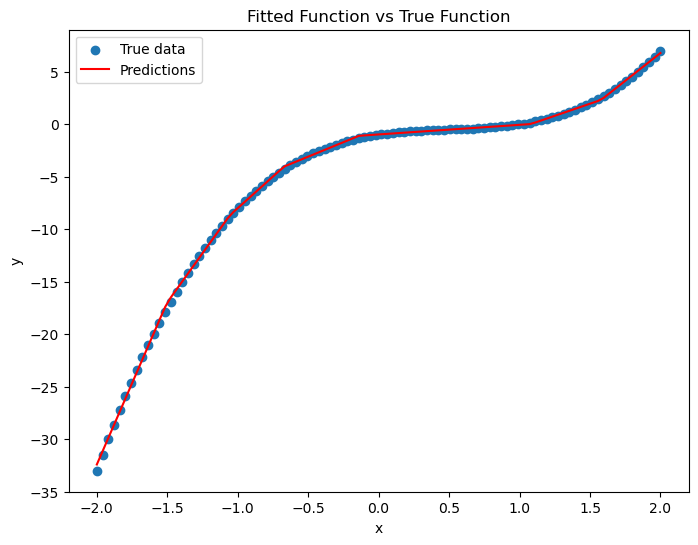

In [11]:

# 测试模型
def test_model(model, x_test, y_test):
    with torch.no_grad():
        inputs = torch.from_numpy(x_test)
        outputs = model(inputs).numpy()
        plt.figure(figsize=(8, 6))
        plt.scatter(x_test, y_test, label='True data')
        plt.plot(x_test, outputs, color='red', label='Predictions')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Fitted Function vs True Function')
        plt.legend()
        plt.show()
        
# 测试模型
test_model(model, x_test, y_test)